In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime

In [25]:
cancer = load_breast_cancer()


In [35]:
X = cancer.data
y = cancer.target
X[1]
np.unique(y)
#只打印前两行
#plt.scatter(X[:,0],X[:,1],c=y)
X[10]

array([1.602e+01, 2.324e+01, 1.027e+02, 7.978e+02, 8.206e-02, 6.669e-02,
       3.299e-02, 3.323e-02, 1.528e-01, 5.697e-02, 3.795e-01, 1.187e+00,
       2.466e+00, 4.051e+01, 4.029e-03, 9.269e-03, 1.101e-02, 7.591e-03,
       1.460e-02, 3.042e-03, 1.919e+01, 3.388e+01, 1.238e+02, 1.150e+03,
       1.181e-01, 1.551e-01, 1.459e-01, 9.975e-02, 2.948e-01, 8.452e-02])

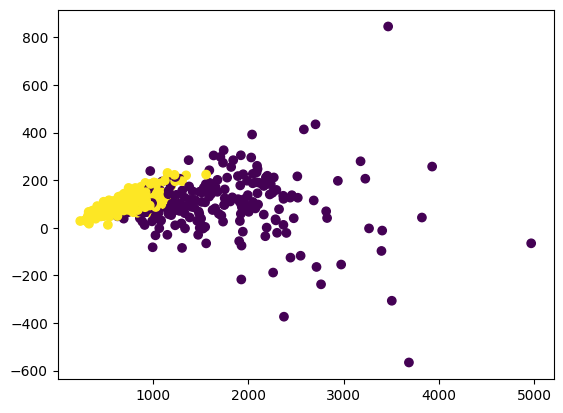

In [27]:
#降维
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_pca=PCA(n_components=3).fit(X)
X_pca.components_
new_X = X.dot(PCA(n_components=2).fit(X).components_.T)

plt.scatter(new_X[:,0],new_X[:,1],c=y)

In [28]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [29]:
Kernel = ['linear','poly','rbf','sigmoid']

In [ ]:
# for kernel in Kernel:
#     time0 = time()
#     clf = SVC(kernel = kernel,
#              gamma = 'auto',
#              #degree = 1,
#              cache_size = 4000#允许使用多大MB内存进行计算
#              ).fit(Xtrain,Ytrain)
#     print('the accuracy under kernel %s is %f' % (kernel,clf.score(Xtest,Ytest)))
#     print(datetime.datetime.fromtimestamp(time()-time0).strftime('%M:%S:%f'))

the accuracy under kernel linear is 0.929825
00:00:540121


In [30]:
Kernel = ['linear','poly','rbf','sigmoid']

for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel = kernel,
             gamma = 'auto',
             degree = 1,
             cache_size = 4000#允许使用多大MB内存进行计算
             ).fit(Xtrain,Ytrain)
    print('the accuracy under kernel %s is %f' % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime('%M:%S:%f'))

the accuracy under kernel linear is 0.929825
00:00:529140
the accuracy under kernel poly is 0.923977
00:00:101025
the accuracy under kernel rbf is 0.596491
00:00:054013
the accuracy under kernel sigmoid is 0.596491
00:00:006002


In [36]:
import pandas as pd
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T
#量纲不统一
#偏态

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,14.127292,3.524049,6.981000,8.458360,9.529200,10.260000,11.700000,13.370000,15.780000,19.530000,24.371600,28.11000
1,569.0,19.289649,4.301036,9.710000,10.930400,13.088000,14.078000,16.170000,18.840000,21.800000,24.992000,30.652000,39.28000
2,569.0,91.969033,24.298981,43.790000,53.827600,60.496000,65.830000,75.170000,86.240000,104.100000,129.100000,165.724000,188.50000
3,569.0,654.889104,351.914129,143.500000,215.664000,275.780000,321.600000,420.300000,551.100000,782.700000,1177.400000,1786.600000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.068654,0.075042,0.079654,0.086370,0.095870,0.105300,0.114820,0.132888,0.16340
5,569.0,0.104341,0.052813,0.019380,0.033351,0.040660,0.049700,0.064920,0.092630,0.130400,0.175460,0.277192,0.34540
6,569.0,0.088799,0.079720,0.000000,0.000000,0.004983,0.013686,0.029560,0.061540,0.130700,0.203040,0.351688,0.42680
7,569.0,0.048919,0.038803,0.000000,0.000000,0.005621,0.011158,0.020310,0.033500,0.074000,0.100420,0.164208,0.20120
8,569.0,0.181162,0.027414,0.106000,0.129508,0.141500,0.149580,0.161900,0.179200,0.195700,0.214940,0.259564,0.30400
9,569.0,0.062798,0.007060,0.049960,0.051504,0.053926,0.055338,0.057700,0.061540,0.066120,0.072266,0.085438,0.09744


In [38]:
#标准化
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T
X[10]

array([ 0.53755602,  0.91927331,  0.44201066,  0.40645325, -1.01768583,
       -0.71354185, -0.70068435, -0.40468555, -1.03547556, -0.82612434,
       -0.09265584, -0.05416438, -0.19804156,  0.00380456, -1.00403368,
       -0.9059213 , -0.69244186, -0.68211388, -0.71948464, -0.2847869 ,
        0.60484876,  1.33577127,  0.49262165,  0.47361134, -0.62547654,
       -0.63082823, -0.60587197, -0.22620973,  0.07643089,  0.03181881])

In [32]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
Kernel = ['linear','poly','rbf','sigmoid']

for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel = kernel,
             gamma = 'auto',
             degree = 1,
             cache_size = 4000#允许使用多大MB内存进行计算
             ).fit(Xtrain,Ytrain)
    print('the accuracy under kernel %s is %f' % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime('%M:%S:%f'))

the accuracy under kernel linear is 0.976608
00:00:013990
the accuracy under kernel poly is 0.964912
00:00:005014
the accuracy under kernel rbf is 0.970760
00:00:008989
the accuracy under kernel sigmoid is 0.953216
00:00:004014


0.9766081871345029 0.012067926406393264


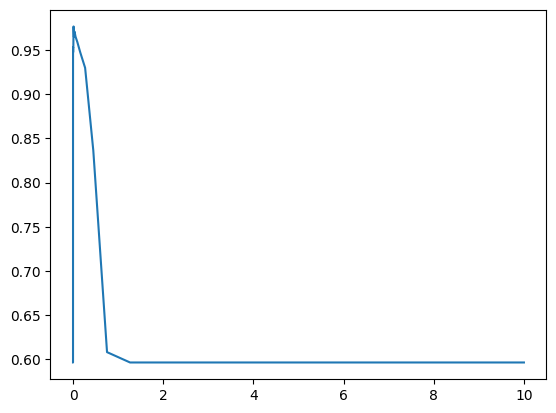

In [42]:
#rbf 调参
score=[]
gamma_range=np.logspace(-10,1,50)
for i in gamma_range:
    clf = SVC(kernel='rbf',gamma = i,cache_size=4000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score),gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()